In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sensormotion as sm
import pandas as pd

In [2]:
df = pd.read_csv("data.csv", header=None)
df.columns = ["id", "gyx", "gyy", "gyz", "acx", "acy", "acz", "mgx", "mgy", "mgz"]
df.head()

,id,gyx,gyy,gyz,acx,acy,acz,mgx,mgy,mgz
0,1,-0.85449,1.95312,3.54004,0.73315,-0.04517,-0.65405,0.22913,0.04602,-0.04993
1,2,0.06104,1.83105,4.76074,0.73083,-0.04297,-0.66028,0.22913,0.04602,-0.04993
2,3,0.06104,1.83105,4.76074,0.73083,-0.04297,-0.66028,0.22913,0.04602,-0.04993
3,4,0.54932,1.58691,5.67627,0.73132,-0.03735,-0.65979,0.22913,0.04602,-0.04993
4,5,0.54932,1.58691,5.67627,0.73132,-0.03735,-0.65979,0.22913,0.04602,-0.04993


In [3]:
x = df["acx"].values
y = df["acy"].values
z = df["acz"].values

In [16]:
len(x)

667

In [15]:
sampling_rate = 119  # number of samples per second
seconds = 5.6
time = np.arange(0, seconds*sampling_rate) * 10  # times in milliseconds
len(time)

667

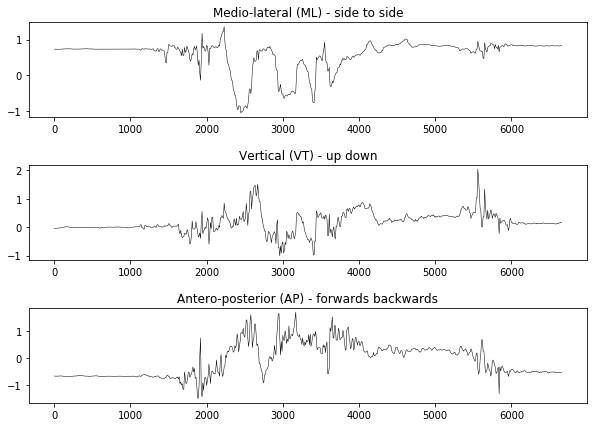

In [17]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10,7))

ax[0].set_title('Medio-lateral (ML) - side to side')
ax[0].plot(time, x, linewidth=0.5, color='k')

ax[1].set_title('Vertical (VT) - up down')
ax[1].plot(time, y, linewidth=0.5, color='k')

ax[2].set_title('Antero-posterior (AP) - forwards backwards')
ax[2].plot(time, z, linewidth=0.5, color='k')

fig.subplots_adjust(hspace=.5)

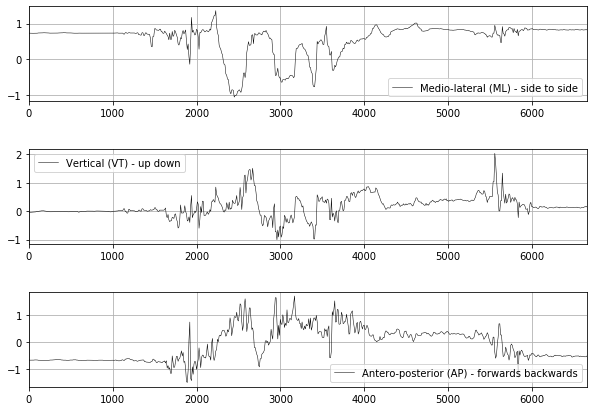

In [18]:
sm.plot.plot_signal(time, [{'data': x, 'label': 'Medio-lateral (ML) - side to side', 'line_width': 0.5},
                           {'data': y, 'label': 'Vertical (VT) - up down', 'line_width': 0.5},
                           {'data': z, 'label': 'Antero-posterior (AP) - forwards backwards', 'line_width': 0.5}],
                    subplots=True, fig_size=(10,7))

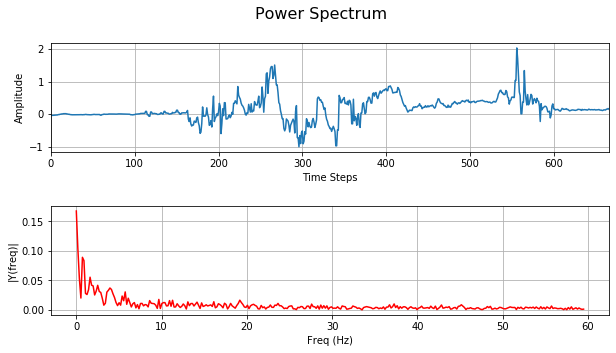

In [20]:
_ = sm.signal.fft(y, sampling_rate, plot=True)

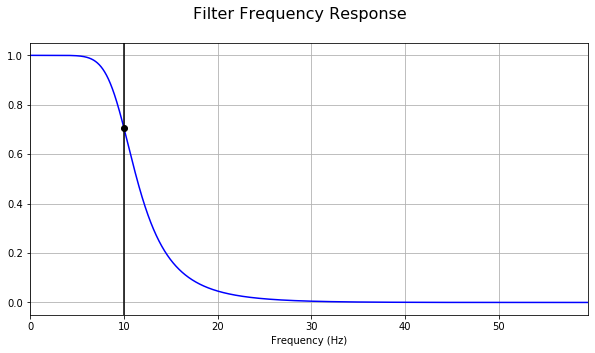

In [21]:
sm.plot.plot_filter_response(10, sampling_rate, 'low', filter_order=4)

In [22]:
# Build the filter
b, a = sm.signal.build_filter(10, sampling_rate, 'low', filter_order=4)

# Filter signals
x_f = sm.signal.filter_signal(b, a, x)  # ML medio-lateral
y_f = sm.signal.filter_signal(b, a, y)  # VT vertical
z_f = sm.signal.filter_signal(b, a, z)  # AP antero-posterior

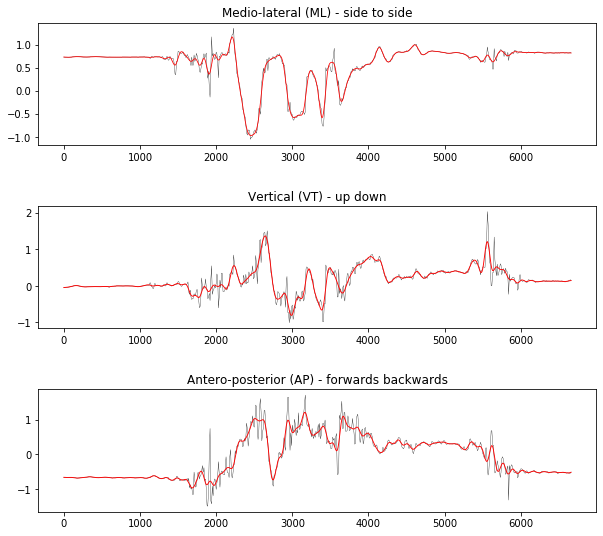

In [23]:
# Create plots with overlaid filtered signals (in red)
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10,9))

ax[0].set_title('Medio-lateral (ML) - side to side')
ax[0].plot(time, x, linewidth=0.3, color='k')
ax[0].plot(time, x_f, linewidth=0.8, color='r')

ax[1].set_title('Vertical (VT) - up down')
ax[1].plot(time, y, linewidth=0.3, color='k')
ax[1].plot(time, y_f, linewidth=0.9, color='r')

ax[2].set_title('Antero-posterior (AP) - forwards backwards')
ax[2].plot(time, z, linewidth=0.3, color='k')
ax[2].plot(time, z_f, linewidth=0.9, color='r')

fig.subplots_adjust(hspace=.5)

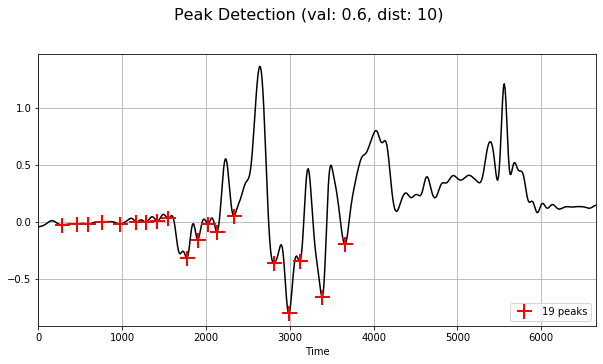

In [24]:
peak_times, peak_values = sm.peak.find_peaks(time, y_f, peak_type='valley', min_val=0.6, min_dist=10, plot=True)